In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip -o house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 688MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

test_cv=pd.read_csv("test.csv")
train_csv=pd.read_csv("train.csv")

In [ ]:
print(train_csv[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head())


   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000


In [ ]:
print(train_csv[['GrLivArea', 'BedroomAbvGr', 'FullBath']].isnull().sum())


GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [ ]:
features=['GrLivArea', 'BedroomAbvGr', 'FullBath']
x=train_csv[features]
y=train_csv['SalePrice']

In [ ]:
print(x.head())
print(y.head())

   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(y_pred)

[113410.67255298 305081.87775899 135904.78562983 205424.67564124
 227502.68349004 121157.48079629 205577.98056584 183787.20378269
 121157.48079629 147219.22233196 185971.75622995  93229.5689926
 121965.26049018 192005.28203666 208129.35962356 133824.25948958
 211250.14883393 146931.57417313 134240.36471763 186179.80884397
 219884.33231595 197726.72892233 185867.72992294 126334.3653847
 181186.54610738 183707.60823788 171720.15216927 118844.47127982
 199183.09722051 199623.63321076 132551.51304323 245162.72491993
 383364.40832164 127998.78629689 202511.9390449  120484.46142981
 200376.66521523 206232.45533514 241160.86372906 120716.94480604
 124645.5137103  251820.40856871 101135.56832553 244746.61969188
 105088.56799199 208912.70855526 123837.7340164  101655.69986059
 271169.30167299 160846.66855057 105088.56799199 221989.28921839
 137960.88100787 360448.30385172 143835.21572496 212706.5171321
 216971.5957196  149458.52246864 118507.96159658 114995.49792036
 109714.58702494 131927.3552

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

r2=r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122
R-squared: 0.6341189942328371


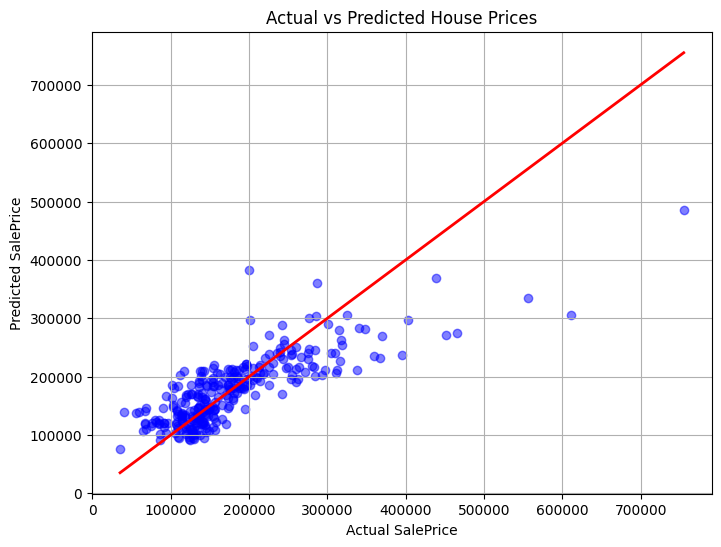

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
